<a href="https://colab.research.google.com/github/DinoKao23/app-deployment/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy pandas-datareader matplotlib scipy

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [1]:
import numpy as np
from random import random
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
def import_stock_data(comp, start='2010-01-01'):
    data = wb.DataReader(comp, data_source='stooq', start=start)
    data = data[::-1]
    data['pct_change'] = data['Close'].pct_change().dropna()
    data['log_return'] = np.log(data['Close']/data['Close'].shift(1)).fillna(value = 0)
    data['Close'].plot(title=f"{comp} Stock Price", ylabel=
                   "Closing Price [$]", figsize=[10, 6])
    plt.show()
    return data

In [4]:
def monte_carlo_simulation(start_price, return_formula, num_simulations, num_days=252):
    simulations = np.zeros((num_simulations, num_days))
    for i in range(num_simulations):
        s_std = return_formula.std()
        s_var = return_formula.var()
        s_mean = return_formula.mean()
        s_drift = s_mean - 0.5 * s_var
        daily_drift = np.exp(s_drift) - 1
        shock = np.random.normal(loc= 0, scale=s_std, size=num_days)
        path = np.zeros(num_days)
        path[0] = start_price
        for day in range(1, num_days):
            path[day] = path[day - 1] * (1 + daily_drift + shock[day])
        simulations[i, :] = path
    return simulations

In [5]:
def plot_simulation(simulations, ticker):
    plt.figure(figsize=(10, 6))
    plt.plot(simulations.T, lw=1, alpha=0.5)
    plt.title('Monte Carlo Simulation of Stock Prices for ' + ticker)
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()

In [6]:
def profit_or_loss(df, sim_result, num_of_stock = 1):
    array1 = sim_result.T[0]
    array2 = sim_result.T[-1]

    profit = 0
    loss = 0
    for i in range(len(array1)):
        if array1[i] < array2[i]:
            profit += 1
        else:
            loss += 1
    max_profit = num_of_stock*(max(array2) - df['Close'][0])
    max_loss = num_of_stock*(min(array2) - df['Close'][0])
    average_profit = num_of_stock* (np.mean(array2)- - df['Close'][0])
    return profit, loss, max_profit, max_loss, average_profit

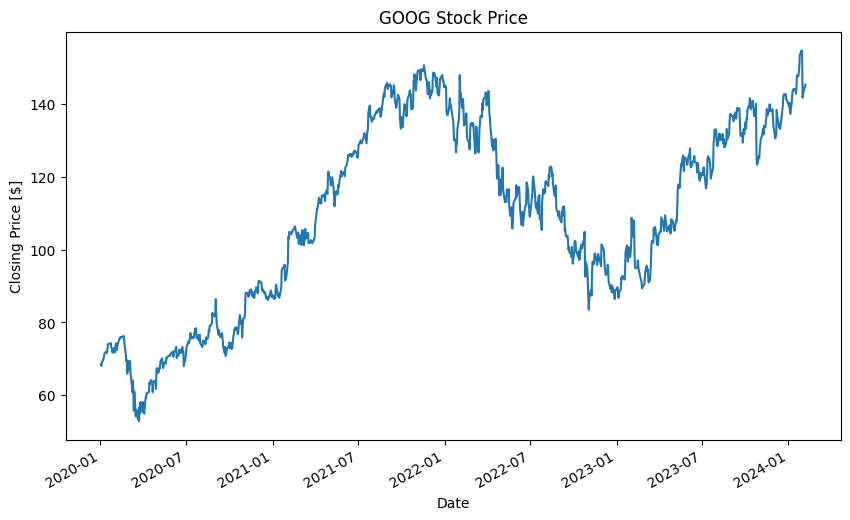

,Open,High,Low,Close,Volume,pct_change,log_return
Date,,,,,,,
2020-01-02,67.0775,68.4070,67.0775,68.3685,28134620,NaN,0.000000
2020-01-03,67.3930,68.6250,67.2770,68.0330,23740120,-0.004907,-0.004919
2020-01-06,67.5000,69.8250,67.5000,69.7105,34662980,0.024657,0.024358
2020-01-07,69.8970,70.1495,69.5190,69.6670,30233860,-0.000624,-0.000624
2020-01-08,69.6040,70.5790,69.5420,70.2160,30583540,0.007880,0.007849
...,...,...,...,...,...,...,...
2024-01-31,145.3900,145.5900,141.5500,141.8000,43908584,-0.073505,-0.076347
2024-02-01,143.6900,144.6200,142.2600,142.7100,25526855,0.006417,0.006397
2024-02-02,140.8900,143.8800,138.1700,143.5400,42136127,0.005816,0.005799


In [7]:
df = import_stock_data("GOOG", start='2020-01-01')
df

<Axes: xlabel='Date'>

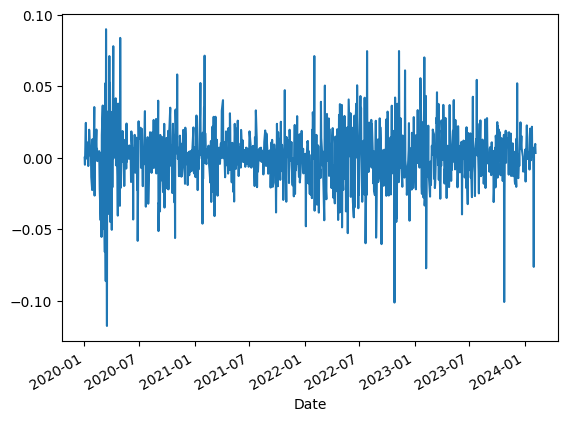

In [8]:
df['log_return'].plot()

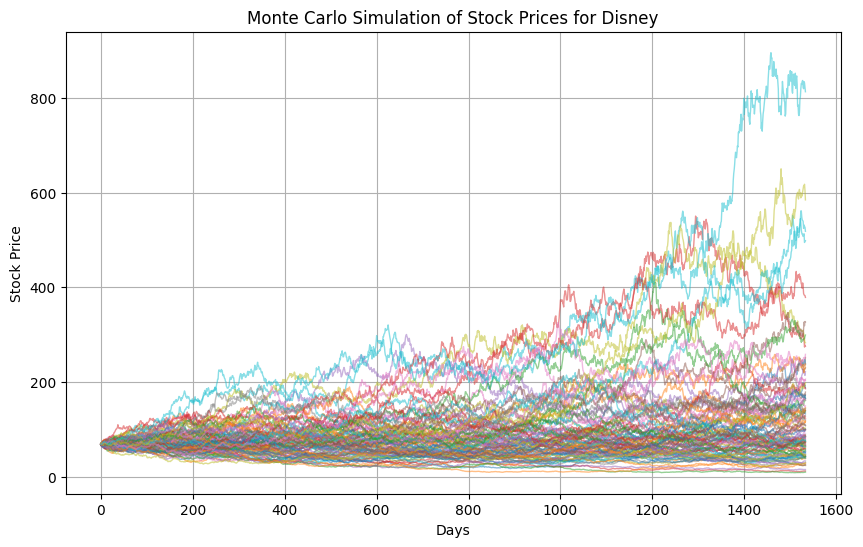

In [9]:
sim = monte_carlo_simulation(df['Close'][0], df['log_return'], 100, 1534)
plot_simulation(sim, "Disney")

In [11]:
profit, loss,max_profit, max_loss,average = profit_or_loss(df, sim)
print(f"Chance of profit by holding this stock: {profit/len(sim)}, the maximum profit is {max_profit - df['Close'][0]}")
print(f"Chance of profit by holding this stock: {loss/len(sim)}, the maximum loss is {max_loss - df['Close'][0]}")

Chance of profit by holding this stock: 0.63, the maximum profit is 676.9301699005257
Chance of profit by holding this stock: 0.37, the maximum loss is -127.38495128135605


In [12]:
# All the profit has already minus the cost
sim = monte_carlo_simulation(df['Close'][0], df['log_return'], 200, 1534)
profit, loss,max_profit, max_loss, average_profit = profit_or_loss(df, sim, 100)
print(f"Chance of profit by holding this stock: {profit/len(sim)}, the maximum profit is {max_profit}")
print(f"Chance of profit by holding this stock: {loss/len(sim)}, the maximum loss is {max_loss}")
print(f"By holding this stock, the average profit is {average_profit}")

Chance of profit by holding this stock: 0.66, the maximum profit is 185735.5112432397
Chance of profit by holding this stock: 0.34, the maximum loss is -5859.910861915694
By holding this stock, the average profit is 21737.359244279825
